# Trees Cover Loss in Kenya - Machine Learning Prediction
This project demonstrates the potential of machine learning to forecast environmental changes, offering valuable insights for planning and conservation efforts.

## Project Overview
This project aims to predict tree cover loss for subnational regions over the next two years (2024 and 2025) using historical data spanning from 2001 to 2023. The predictions are made using a Linear Regression model trained on this historical data, allowing for the estimation of future tree cover loss based on observed trends.

**Key Objectives:**
- Accurate Prediction: Provide reliable predictions for tree cover loss to help stakeholders anticipate and respond to environmental changes.
- Data Integration: Seamlessly integrate predictive insights into existing datasets for comprehensive analysis.
- Accessibility: Ensure that the results are easily accessible and interpretable by saving the predictions in user-friendly formats (Excel, CSV).

## Dataset
The [dataset](https://www.globalforestwatch.org/dashboards/country/KEN/?category=forest-change&location=WyJjb3VudHJ5IiwiS0VOIl0%3D) used in this project provides a comprehensive overview of tree cover loss across various subnational regions in Kenya from 2001 to 2023. It includes detailed annual data on the extent of tree cover loss, which serves as the basis for analyzing trends and predicting future changes in forest cover.

## Data Collection and Pre-processing

**Install Dependencies**

In [213]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [214]:
excel_file = pd.ExcelFile('/kaggle/input/kenya-forest/KEN.xlsx')

excel_file.sheet_names

['Read_Me',
 'Country tree cover loss',
 'Country carbon data',
 'Subnational 1 tree cover loss',
 'Subnational 1 carbon data',
 'Subnational 2 tree cover loss',
 'Subnational 2 carbon data']

In [215]:
national_df = pd.read_excel(excel_file, sheet_name = 'Country tree cover loss')

national_df.head()

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Kenya,0,58598336,58598336,58598336,117013,23089,24930,22022,22233,...,31439,21282,29967,35337,24752,24388,29372,20464,14175,21372
1,Kenya,10,58598336,11005209,10722784,117013,22555,24331,20794,21878,...,26629,20275,28831,33086,23060,22629,27374,18184,12267,18527
2,Kenya,15,58598336,7584335,7996736,117013,21701,23310,18542,20951,...,23307,19317,27217,30737,21605,21333,25857,15820,10929,16589
3,Kenya,20,58598336,4292246,4497663,117013,20064,21378,15067,18534,...,17827,16950,21858,25190,17969,18115,21672,9957,8080,13073
4,Kenya,25,58598336,3975189,4103951,117013,19814,21148,14675,18184,...,16912,16484,20881,24196,17365,17442,20966,9043,7633,12508


In [216]:
national_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            8 non-null      object
 1   threshold          8 non-null      int64 
 2   area_ha            8 non-null      int64 
 3   extent_2000_ha     8 non-null      int64 
 4   extent_2010_ha     8 non-null      int64 
 5   gain_2000-2020_ha  8 non-null      int64 
 6   tc_loss_ha_2001    8 non-null      int64 
 7   tc_loss_ha_2002    8 non-null      int64 
 8   tc_loss_ha_2003    8 non-null      int64 
 9   tc_loss_ha_2004    8 non-null      int64 
 10  tc_loss_ha_2005    8 non-null      int64 
 11  tc_loss_ha_2006    8 non-null      int64 
 12  tc_loss_ha_2007    8 non-null      int64 
 13  tc_loss_ha_2008    8 non-null      int64 
 14  tc_loss_ha_2009    8 non-null      int64 
 15  tc_loss_ha_2010    8 non-null      int64 
 16  tc_loss_ha_2011    8 non-null      int64 
 17  t

In [217]:
national_df.describe()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
count,8.00000,8.0,8.000000e+00,8.000000e+00,8.0,8.00000,8.000000,8.000000,8.000000,8.00000,...,8.000000,8.00000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,28.12500,58598336.0,1.145374e+07,1.150549e+07,117013.0,19258.12500,20816.625000,15271.625000,17565.000000,15587.12500,...,18292.000000,15975.37500,20892.37500,24235.375000,17027.875000,16648.875000,20104.500000,10565.875000,7997.500000,12900.625000
std,24.04423,0.0,1.931930e+07,1.929620e+07,0.0,3786.92987,3772.546163,5095.221822,4652.589632,6787.00364,...,8682.668731,4935.78235,8086.56692,9184.705562,6605.362355,6948.259215,8299.485991,7104.376145,4450.011878,6022.308502
min,0.00000,58598336.0,9.636850e+05,8.298150e+05,117013.0,11605.00000,13517.000000,6914.000000,8811.000000,5855.00000,...,4822.000000,6452.00000,6832.00000,8309.000000,5026.000000,3683.000000,4659.000000,638.000000,954.000000,3041.000000
25%,13.75000,58598336.0,2.962480e+06,2.991418e+06,117013.0,18322.75000,19623.750000,12816.250000,15976.250000,11894.75000,...,14028.500000,14568.75000,17412.25000,20338.500000,14565.500000,14375.250000,17256.500000,6387.250000,5805.000000,10152.250000
50%,22.50000,58598336.0,4.133718e+06,4.300807e+06,117013.0,19939.00000,21263.000000,14871.000000,18359.000000,14378.00000,...,17369.500000,16717.00000,21369.50000,24693.000000,17667.000000,17778.500000,21319.000000,9500.000000,7856.500000,12790.500000
75%,35.00000,58598336.0,8.439554e+06,8.678248e+06,117013.0,21914.50000,23565.250000,19105.000000,21182.750000,19894.50000,...,24137.500000,19556.50000,27620.50000,31324.250000,21968.750000,21657.000000,26236.250000,16411.000000,11263.500000,17073.500000
max,75.00000,58598336.0,5.859834e+07,5.859834e+07,117013.0,23089.00000,24930.000000,22022.000000,22233.000000,26367.00000,...,31439.000000,21282.00000,29967.00000,35337.000000,24752.000000,24388.000000,29372.000000,20464.000000,14175.000000,21372.000000


In [218]:
national_df.shape

(8, 29)

In [219]:
national_df.columns

Index(['country', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha',
       'gain_2000-2020_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002',
       'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005',
       'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008',
       'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011',
       'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014',
       'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017',
       'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020',
       'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023'],
      dtype='object')

In [220]:
# Renaming columns
national_df.rename(columns=lambda x: x.replace('tc_loss_ha_', '') if x.startswith('tc_loss_ha_') else x, inplace=True)
national_df.head(10)

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kenya,0,58598336,58598336,58598336,117013,23089,24930,22022,22233,...,31439,21282,29967,35337,24752,24388,29372,20464,14175,21372
1,Kenya,10,58598336,11005209,10722784,117013,22555,24331,20794,21878,...,26629,20275,28831,33086,23060,22629,27374,18184,12267,18527
2,Kenya,15,58598336,7584335,7996736,117013,21701,23310,18542,20951,...,23307,19317,27217,30737,21605,21333,25857,15820,10929,16589
3,Kenya,20,58598336,4292246,4497663,117013,20064,21378,15067,18534,...,17827,16950,21858,25190,17969,18115,21672,9957,8080,13073
4,Kenya,25,58598336,3975189,4103951,117013,19814,21148,14675,18184,...,16912,16484,20881,24196,17365,17442,20966,9043,7633,12508
5,Kenya,30,58598336,3319483,3335503,117013,19027,20288,13553,16988,...,15357,15616,19048,22163,15908,15950,19045,7564,6639,11257
6,Kenya,50,58598336,1891472,1959165,117013,16210,17631,10606,12941,...,10043,11427,12505,14865,10538,9651,11891,2857,3303,6838
7,Kenya,75,58598336,963685,829815,117013,11605,13517,6914,8811,...,4822,6452,6832,8309,5026,3683,4659,638,954,3041


In [221]:
columns_to_drop = ['country', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha']

# Drop columns in place
national_df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
national_df.head()

,threshold,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,23089,24930,22022,22233,26367,29170,32475,26988,30049,...,31439,21282,29967,35337,24752,24388,29372,20464,14175,21372
1,10,22555,24331,20794,21878,22656,26666,31614,25938,27248,...,26629,20275,28831,33086,23060,22629,27374,18184,12267,18527
2,15,21701,23310,18542,20951,18974,24830,30406,24425,24245,...,23307,19317,27217,30737,21605,21333,25857,15820,10929,16589
3,20,20064,21378,15067,18534,14608,22178,27815,21166,19841,...,17827,16950,21858,25190,17969,18115,21672,9957,8080,13073
4,25,19814,21148,14675,18184,14148,21819,27436,20670,19265,...,16912,16484,20881,24196,17365,17442,20966,9043,7633,12508


In [222]:
national_df.columns

Index(['threshold', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [223]:
sub_national_df = pd.read_excel(excel_file, sheet_name = 'Subnational 2 tree cover loss')

sub_national_df.head()

,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Kenya,Baringo,805,0,17383,17383,17383,9,0,2,...,10,1,5,0,0,0,0,11,2,7
1,Kenya,Baringo,805,10,17383,2875,1358,9,0,2,...,4,1,3,0,0,0,0,9,1,2
2,Kenya,Baringo,805,15,17383,1280,929,9,0,1,...,1,0,2,0,0,0,0,5,1,1
3,Kenya,Baringo,805,20,17383,154,128,9,0,0,...,0,0,0,0,0,0,0,3,0,0
4,Kenya,Baringo,805,25,17383,107,60,9,0,0,...,0,0,0,0,0,0,0,2,0,0


In [224]:
sub_national_df.shape

(2408, 31)

In [225]:
sub_national_df.columns

Index(['country', 'subnational1', 'subnational2', 'threshold', 'area_ha',
       'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha',
       'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003',
       'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006',
       'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009',
       'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012',
       'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015',
       'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018',
       'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021',
       'tc_loss_ha_2022', 'tc_loss_ha_2023'],
      dtype='object')

In [226]:
# Renaming columns
sub_national_df.rename(columns=lambda x: x.replace('tc_loss_ha_', '') if x.startswith('tc_loss_ha_') else x, inplace=True)
sub_national_df.head(10)

,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kenya,Baringo,805,0,17383,17383,17383,9,0,2,...,10,1,5,0,0,0,0,11,2,7
1,Kenya,Baringo,805,10,17383,2875,1358,9,0,2,...,4,1,3,0,0,0,0,9,1,2
2,Kenya,Baringo,805,15,17383,1280,929,9,0,1,...,1,0,2,0,0,0,0,5,1,1
3,Kenya,Baringo,805,20,17383,154,128,9,0,0,...,0,0,0,0,0,0,0,3,0,0
4,Kenya,Baringo,805,25,17383,107,60,9,0,0,...,0,0,0,0,0,0,0,2,0,0
5,Kenya,Baringo,805,30,17383,47,46,9,0,0,...,0,0,0,0,0,0,0,2,0,0
6,Kenya,Baringo,805,50,17383,1,2,9,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Kenya,Baringo,805,75,17383,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Kenya,Baringo,Baringo Central,0,66118,66118,66118,162,17,38,...,76,114,156,194,132,102,85,69,72,123
9,Kenya,Baringo,Baringo Central,10,66118,46549,50145,162,17,38,...,74,114,152,191,131,100,84,68,69,121


In [227]:
columns_to_drop_sub = ['country', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha']

# Drop columns in place
sub_national_df.drop(columns=columns_to_drop_sub, inplace=True)

# Display the updated DataFrame
sub_national_df.head()

,subnational1,subnational2,threshold,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Baringo,805,0,0,2,2,3,1,1,1,...,10,1,5,0,0,0,0,11,2,7
1,Baringo,805,10,0,2,2,3,0,1,1,...,4,1,3,0,0,0,0,9,1,2
2,Baringo,805,15,0,1,1,2,0,0,0,...,1,0,2,0,0,0,0,5,1,1
3,Baringo,805,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
4,Baringo,805,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [228]:
sub_national_df.columns

Index(['subnational1', 'subnational2', 'threshold', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')

In [229]:
sub_national_df['threshold'].value_counts()

threshold
0     301
10    301
15    301
20    301
25    301
30    301
50    301
75    301
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

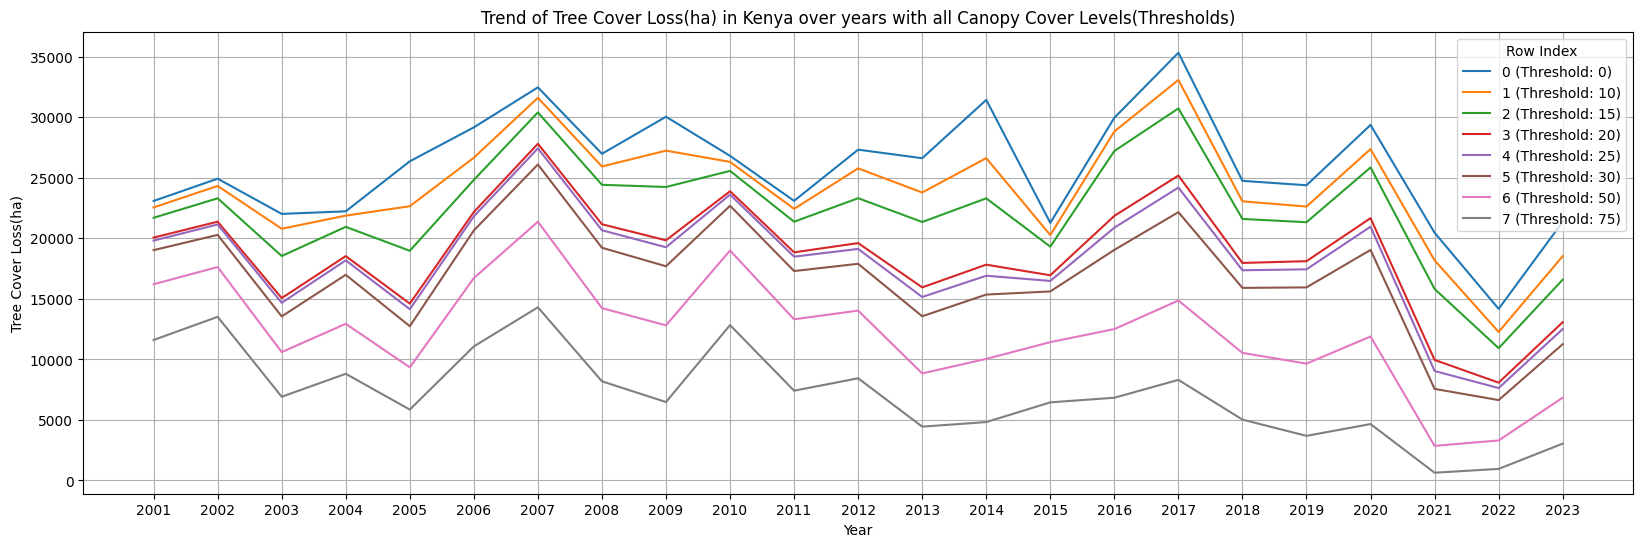

In [230]:
# Extract years from the DataFrame columns
years = [str(year) for year in range(2001, 2024)] # ensure years are in string format

# Plot the trend of the threshold column over the years
plt.figure(figsize=(20, 6))

# Loop over each row in the DataFrame
for index, row in national_df.iterrows():
    # Extract the 'threshold' value for the current row
    threshold_value = row['threshold']
    
    # Extract data for each year from the row
    values = [row[year] for year in years if year in row]

    # Plot the values for this row
    plt.plot(years[:len(values)], values, label=f'{index} (Threshold: {threshold_value})')

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Trend of Tree Cover Loss(ha) in Kenya over years with all Canopy Cover Levels(Thresholds)')
plt.legend(title='Row Index')
plt.grid(True)
plt.show()

For the years 2020, 2021 and 2022, tree cover loss of all canopy levels/thresholds greatly reduced. Then in 2023 tree cover loss spiked...

Reason could be because in 2020 Kenya banned logging and then re-opened it in 2023

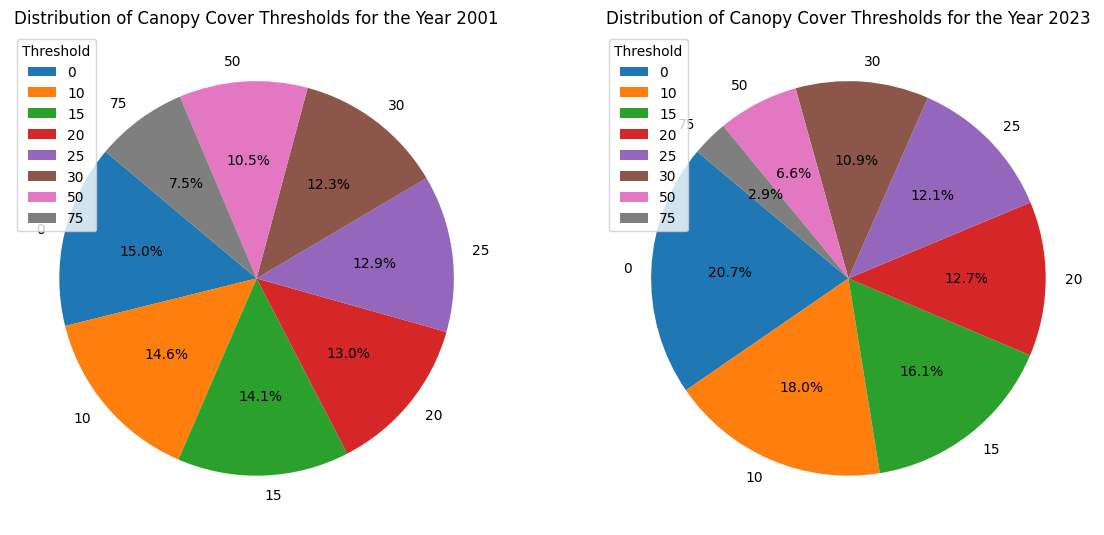

In [231]:
# Calculate the distribution of thresholds for the years 2023 and 2001
threshold_distribution_2023 = national_df.groupby('threshold')['2023'].sum()
threshold_distribution_2001 = national_df.groupby('threshold')['2001'].sum()

# figure and axes for side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot for 2001
ax1.pie(threshold_distribution_2001, labels=threshold_distribution_2001.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of Canopy Cover Thresholds for the Year 2001')
ax1.legend(threshold_distribution_2001.index, title='Threshold', loc='best')

# Plot for 2023
ax2.pie(threshold_distribution_2023, labels=threshold_distribution_2023.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Canopy Cover Thresholds for the Year 2023')
ax2.legend(threshold_distribution_2023.index, title='Threshold', loc='best')

plt.show()

Tree cover loss has generally increased in the last 13yrs across all canopy cover thresholds

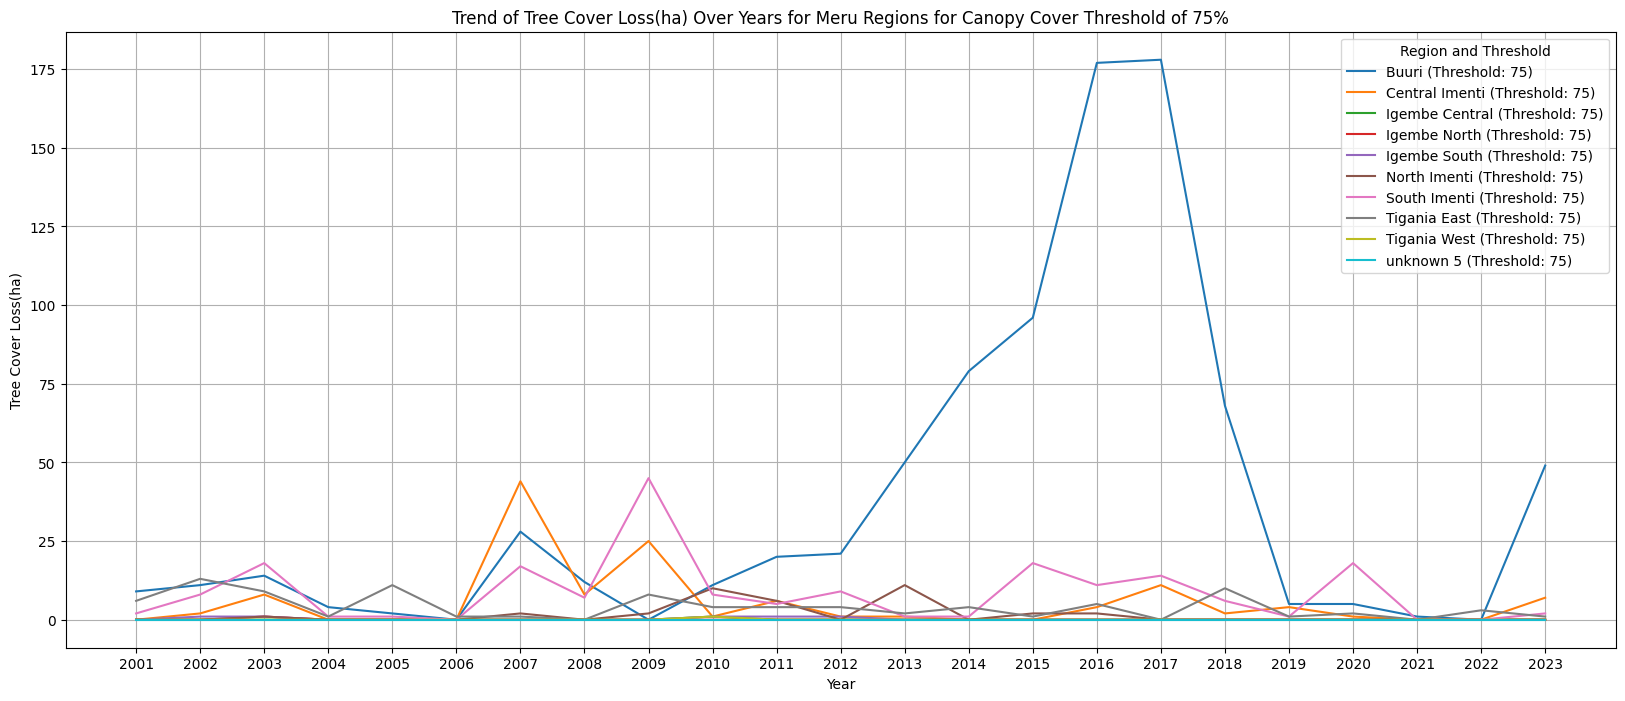

In [232]:
# Threshold values to filter
threshold_values = [75]

# Filter df for rows where subnational1 is 'Meru' and threshold is in the specified values
filtered_df = sub_national_df[(sub_national_df['subnational1'] == 'Meru') & (sub_national_df['threshold'].isin(threshold_values))]

# Extract years 
years = [str(year) for year in range(2001, 2024)]

# Plot
plt.figure(figsize=(20, 8))

# Loop over each unique value in subnational2
for region in filtered_df['subnational2'].unique():
    region_data = filtered_df[filtered_df['subnational2'] == region]
    
    # Plot data for this region and each threshold
    for threshold in threshold_values:
        threshold_data = region_data[region_data['threshold'] == threshold]
        for _, row in threshold_data.iterrows():
            values = [row[year] for year in years if year in row]
            plt.plot(years[:len(values)], values, label=f'{region} (Threshold: {threshold})')

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Trend of Tree Cover Loss(ha) Over Years for Meru Regions for Canopy Cover Threshold of 75%')
plt.legend(title='Region and Threshold')
plt.grid(True)
plt.show()

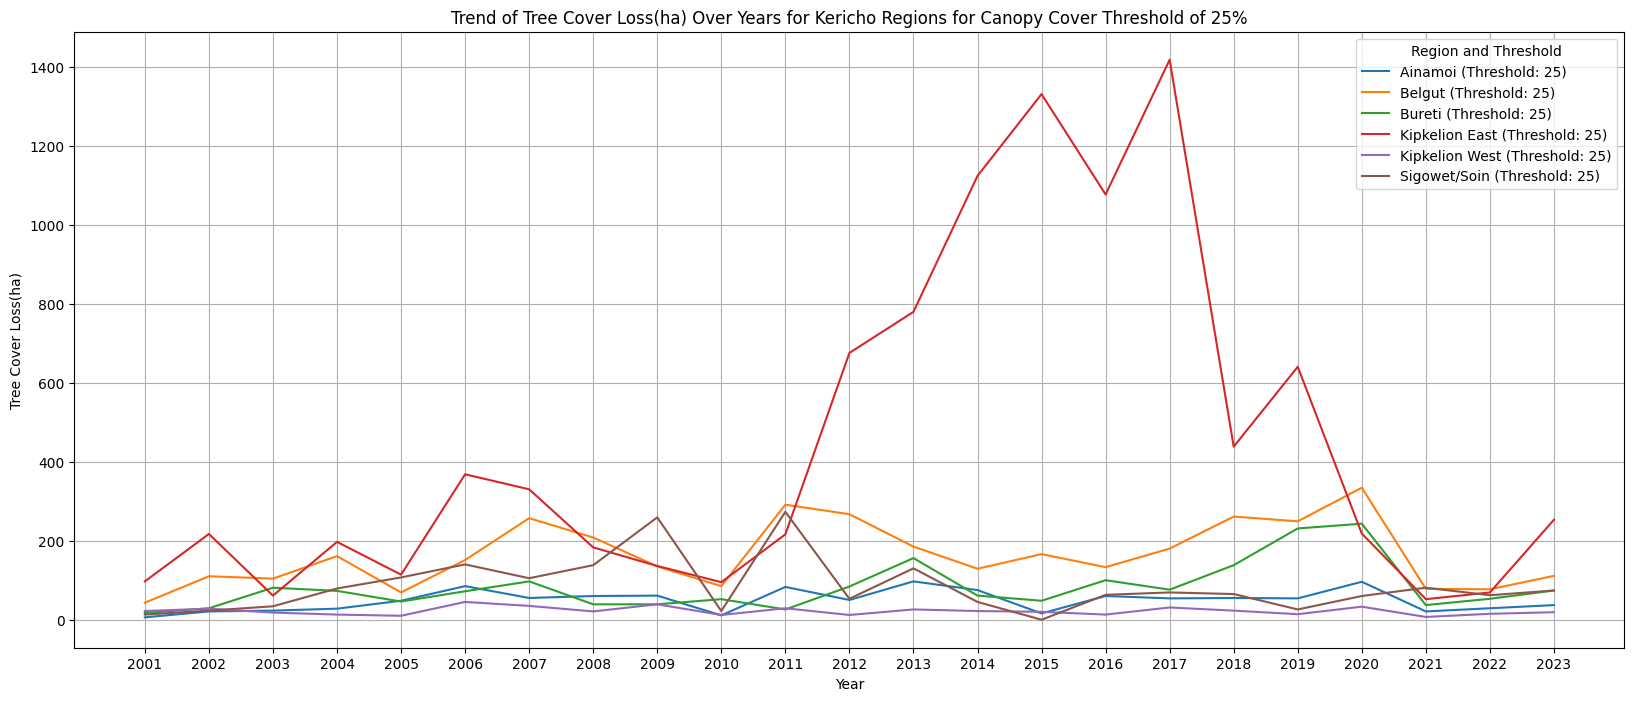

In [233]:
# Threshold values to filter
threshold_values = [25]

# Filter DataFrame for rows where subnational1 is 'Kericho' and threshold is in the specified values
filtered_df = sub_national_df[(sub_national_df['subnational1'] == 'Kericho') & (sub_national_df['threshold'].isin(threshold_values))]

# Extract years 
years = [str(year) for year in range(2001, 2024)]

# Plotting
plt.figure(figsize=(20, 8))

# Loop over each unique value in subnational2
for region in filtered_df['subnational2'].unique():
    region_data = filtered_df[filtered_df['subnational2'] == region]
    
    # Plot data for this region and each threshold
    for threshold in threshold_values:
        threshold_data = region_data[region_data['threshold'] == threshold]
        for _, row in threshold_data.iterrows():
            values = [row[year] for year in years if year in row]
            plt.plot(years[:len(values)], values, label=f'{region} (Threshold: {threshold})')

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Trend of Tree Cover Loss(ha) Over Years for Kericho Regions for Canopy Cover Threshold of 25%')
plt.legend(title='Region and Threshold')
plt.grid(True)
plt.show()

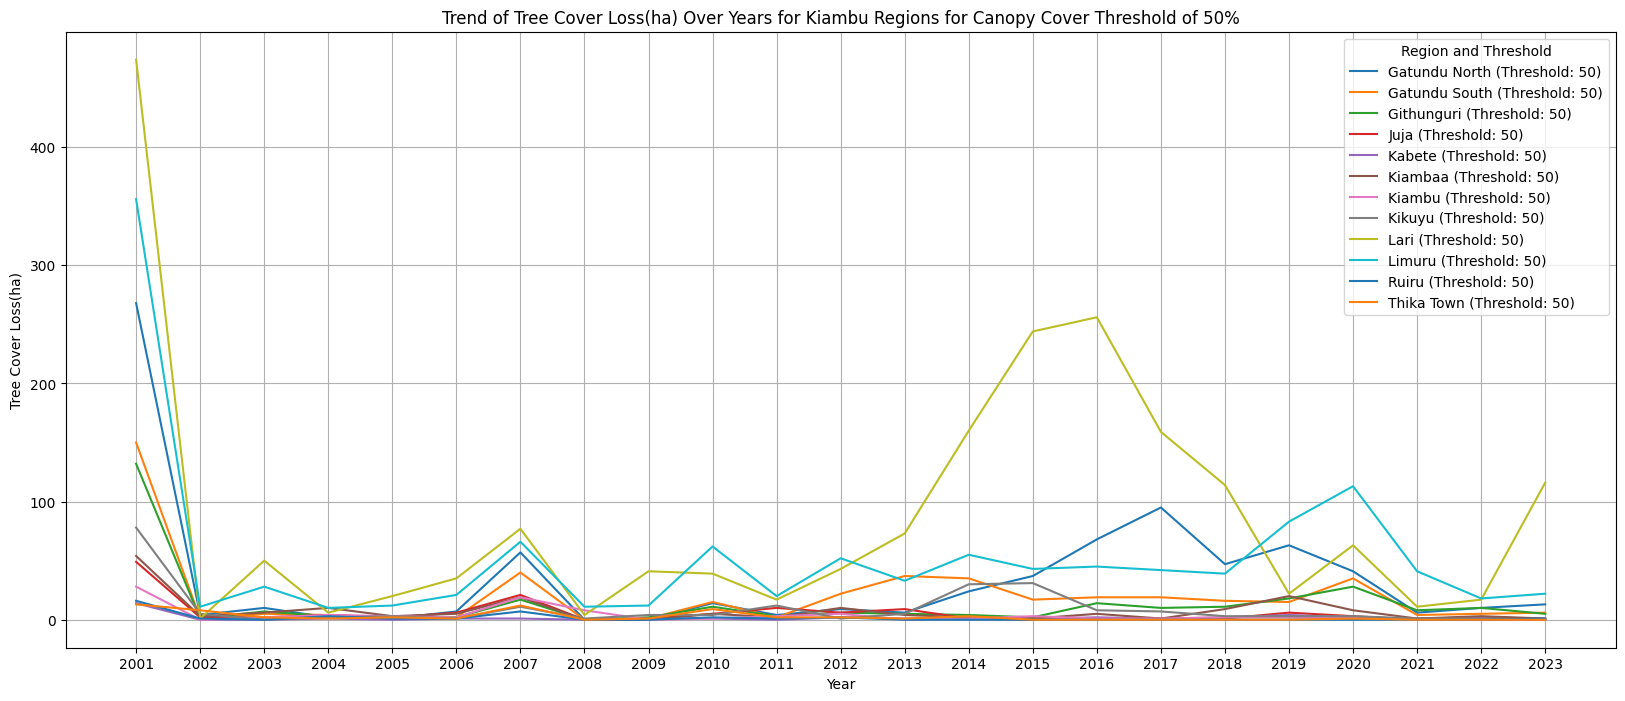

In [234]:
# Threshold values to filter
threshold_values = [50]

# Filter DataFrame for rows where subnational1 is 'Kiambu' and threshold is in the specified values
filtered_df = sub_national_df[(sub_national_df['subnational1'] == 'Kiambu') & (sub_national_df['threshold'].isin(threshold_values))]

# Extract years 
years = [str(year) for year in range(2001, 2024)]

# Plot
plt.figure(figsize=(20, 8))

# Loop over each unique value in subnational2
for region in filtered_df['subnational2'].unique():
    region_data = filtered_df[filtered_df['subnational2'] == region]
    
    # Plot data for this region and each threshold
    for threshold in threshold_values:
        threshold_data = region_data[region_data['threshold'] == threshold]
        for _, row in threshold_data.iterrows():
            values = [row[year] for year in years if year in row]
            plt.plot(years[:len(values)], values, label=f'{region} (Threshold: {threshold})')

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Trend of Tree Cover Loss(ha) Over Years for Kiambu Regions for Canopy Cover Threshold of 50%')
plt.legend(title='Region and Threshold')
plt.grid(True)
plt.show()

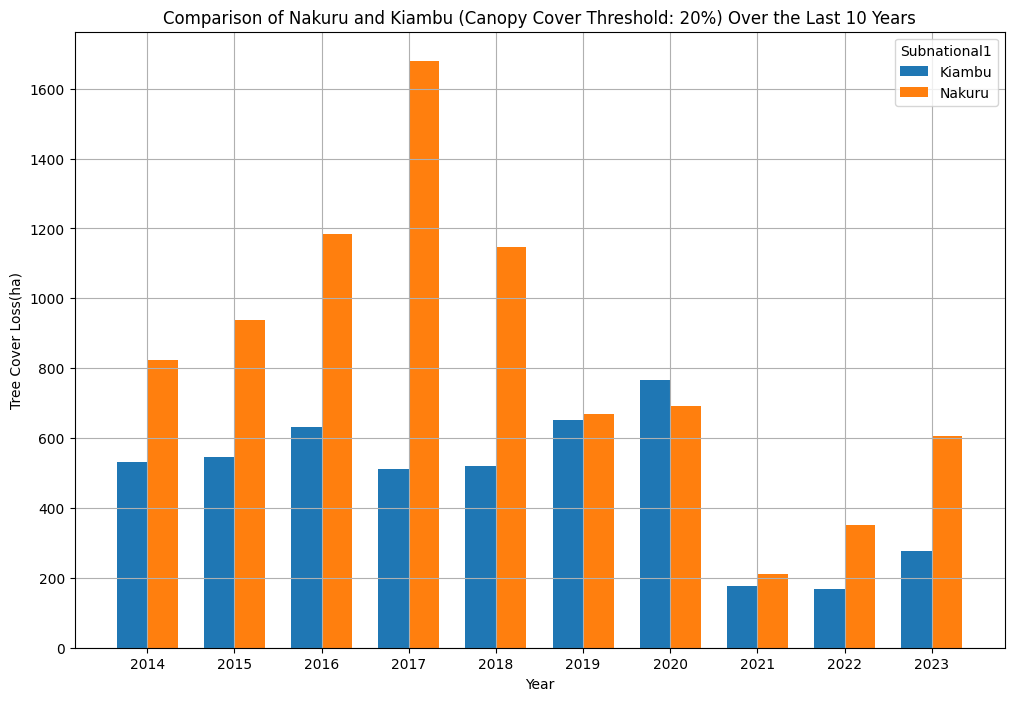

In [235]:
# Filter DataFrame for rows where threshold is 20
threshold_20_df = sub_national_df[sub_national_df['threshold'] == 20]

# Define the last 10 years
last_10_years = [str(year) for year in range(2014, 2024)]

# Filter the DataFrame to include only 'Nakuru' and 'Kiambu' in subnational1
filtered_df = threshold_20_df[threshold_20_df['subnational1'].isin(['Nakuru', 'Kiambu'])]

# Group by subnational1 and sum the data across the last 10 years
grouped_df = filtered_df.groupby('subnational1')[last_10_years].sum()

# Plotting
plt.figure(figsize=(12, 8))

# Set the width for bars
bar_width = 0.35

# Calculate positions for bars
r = range(len(last_10_years))

# Plot bars for Nakuru and Kiambu
for i, region in enumerate(grouped_df.index):
    values = grouped_df.loc[region].values
    plt.bar([p + i * bar_width for p in r], values, width=bar_width, label=f'{region}')

# Configure the x-ticks
plt.xticks([p + bar_width / 2 for p in r], last_10_years)

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Comparison of Nakuru and Kiambu (Canopy Cover Threshold: 20%) Over the Last 10 Years')
plt.legend(title='Subnational1')
plt.grid(True)
plt.show()

Nakuru has had greater tree cover loss than Kiambu over the last 10 yrs. Nakuru has also greatly decreased its tree cover loss in the last 5yrs

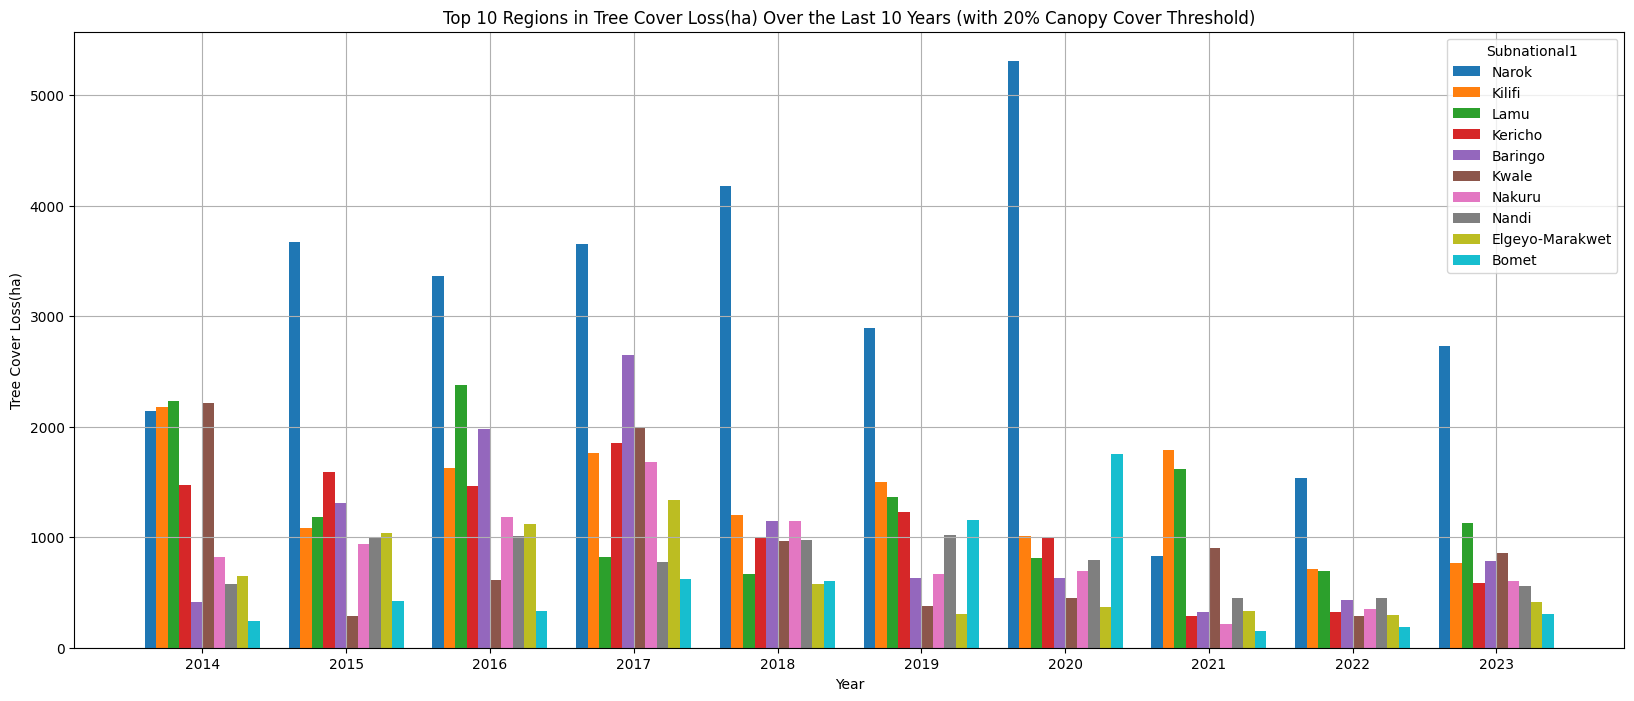

In [236]:
# Filter df for rows where threshold is 20
threshold_20_df = sub_national_df[sub_national_df['threshold'] == 20]

# Define the last 10 years
last_10_years = [str(year) for year in range(2014, 2024)]

# Group by subnational1 and sum the values across the last 10 years
grouped_df = threshold_20_df.groupby('subnational1')[last_10_years].sum()

# Sum across the last 10 years to get total for each subnational1
grouped_df['total_last_10_years'] = grouped_df.sum(axis=1)

# Sort by the total and select the top 10 subnational1
top_10_subnational1 = grouped_df['total_last_10_years'].nlargest(10).index

# Filter the df to include only the top 10 subnational1
top_10_df = grouped_df.loc[top_10_subnational1]

# Plot
plt.figure(figsize=(20, 8))

# Set the width for bars
bar_width = 0.08

# Calculate positions for bars
r = range(len(last_10_years))

# Loop over each unique value in subnational1 within the top 10
for i, region in enumerate(top_10_df.index):
    values = top_10_df.loc[region, last_10_years].values
    plt.bar([p + i * bar_width for p in r], values, width=bar_width, label=f'{region}')

# Configure the x-ticks
plt.xticks([p + (len(top_10_df.index) - 1) * bar_width / 2 for p in r], last_10_years)

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Top 10 Regions in Tree Cover Loss(ha) Over the Last 10 Years (with 20% Canopy Cover Threshold)')
plt.legend(title='Subnational1')
plt.grid(True)
plt.show()

Narok is by far the region that has been greatly impacted by tree cover loss, could be because of over-logging or trees are cut down and the land used for agricultural purposes

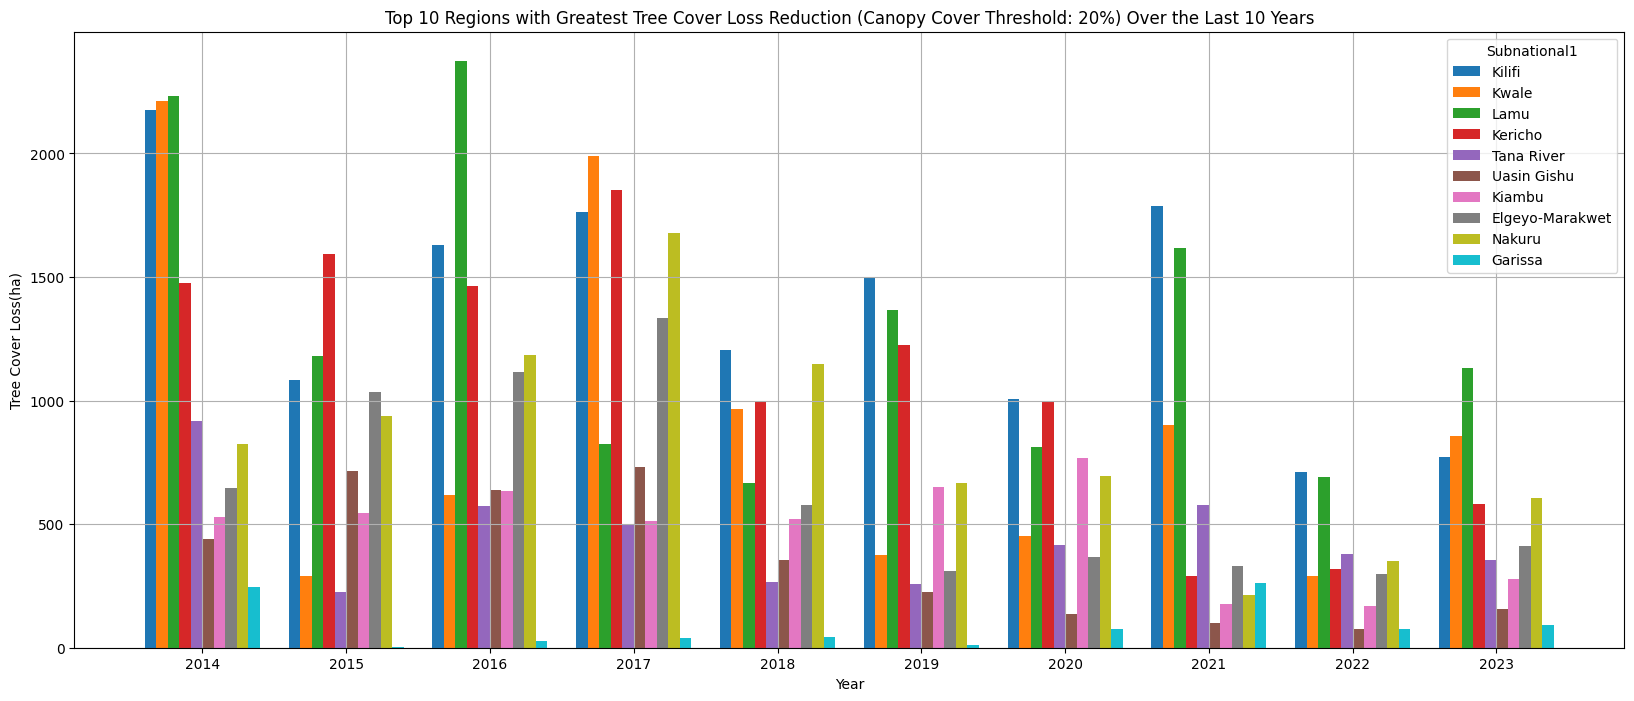

In [237]:
# Filter df for rows where threshold is 20
threshold_20_df = sub_national_df[sub_national_df['threshold'] == 20]

# Define the last 10 years
last_10_years = [str(year) for year in range(2014, 2024)]

# Group by subnational1 and calculate the difference between the first and last year in the last 10 years
grouped_df = threshold_20_df.groupby('subnational1')[last_10_years].sum()
grouped_df['reduction'] = grouped_df[last_10_years[0]] - grouped_df[last_10_years[-1]]

# Sort by the reduction and select the top 10 subnational1 with the greatest reduction
top_10_reduction_subnational1 = grouped_df['reduction'].nlargest(10).index

# Filter the DataFrame to include only the top 10 subnational1 with the greatest reduction
top_10_reduction_df = grouped_df.loc[top_10_reduction_subnational1]

# Plotting
plt.figure(figsize=(20, 8))

# Set the width for bars
bar_width = 0.08

# Calculate positions for bars
r = range(len(last_10_years))

# Loop over each unique value in subnational1 within the top 10 reduction
for i, region in enumerate(top_10_reduction_df.index):
    values = top_10_reduction_df.loc[region, last_10_years].values
    plt.bar([p + i * bar_width for p in r], values, width=bar_width, label=f'{region}')

# Configure the x-ticks
plt.xticks([p + (len(top_10_reduction_df.index) - 1) * bar_width / 2 for p in r], last_10_years)

plt.xlabel('Year')
plt.ylabel('Tree Cover Loss(ha)')
plt.title('Top 10 Regions with Greatest Tree Cover Loss Reduction (Canopy Cover Threshold: 20%) Over the Last 10 Years')
plt.legend(title='Subnational1')
plt.grid(True)
plt.show()

Coastal regions(Kilifi, kwale and Lamu) of Kenya had the greatest tree cover loss reduction in the last 10yrs because the government and community expanded mangrove rehabilitation, established farm forestry and enhanced capacity building.

## Findings and Possible Conservation Efforts
### Findings:
**1. Significant Trends in Tree Cover Loss:**
- Analysis of the data revealed that tree cover loss has fluctuated over the years, with notable reductions in certain regions during specific periods. For instance, a marked decrease in tree cover loss was observed across Kenya from 2020 to 2022, likely influenced by the national logging ban.
- However, a concerning spike in tree cover loss was predicted for 2023, potentially linked to the lifting of the logging ban, indicating a possible resurgence of deforestation activities.

**2. Regional Variations:**
- The data analysis highlighted that different regions within Kenya have experienced varying degrees of tree cover loss. Regions like Nakuru and Kiambu have shown distinct trends, with Nakuru experiencing greater loss in recent years, while Kiambu demonstrated a more significant reduction, particularly in the last five years.
- Coastal regions such as Kilifi, Kwale, and Lamu were identified as having the greatest reduction in tree cover loss, possibly due to concerted efforts in mangrove rehabilitation, farm forestry, and capacity building.

**3. Prediction Insights:**
- The predictions for 2024 and 2025 indicate that certain regions may continue to experience high levels of tree cover loss unless intervention measures are put in place. Narok, for instance, is forecasted to face severe deforestation, which may be driven by factors such as logging, agricultural expansion, or other land-use changes.

### Possible Conservation Efforts:
**1. Strengthening Logging Regulations:**
- To mitigate the predicted increase in tree cover loss, Kenya could consider re-implementing or tightening logging regulations. A balanced approach that allows sustainable logging while protecting vital forested areas could prevent further deforestation.

**2. Community-Based Forest Management:**
- Encouraging community involvement in forest management, especially in regions like Narok and Nakuru, could help reduce deforestation rates. Programs that promote sustainable agriculture, agroforestry, and reforestation could empower local communities to protect their natural resources.

**3. Mangrove and Coastal Forest Conservation:**
- The success observed in coastal regions through mangrove rehabilitation and farm forestry efforts should be expanded and replicated in other vulnerable areas. These efforts not only reduce tree cover loss but also enhance biodiversity, support fisheries, and protect against coastal erosion.

**4. Reforestation and Afforestation Initiatives:**
- Large-scale reforestation and afforestation projects could be key to reversing tree cover loss trends. By planting trees in deforested and degraded areas, regions like Narok and Nakuru could see long-term ecological recovery.
  
**5. Policy Development and Enforcement:**
- Developing and enforcing environmental policies that prioritize forest conservation is crucial. This could include incentives for private landowners to maintain forest cover, penalties for illegal logging, and the creation of protected areas where deforestation is strictly controlled.

**6. Public Awareness and Education:**
- Raising awareness about the importance of forests and the impact of deforestation can mobilize public support for conservation efforts. Educational campaigns could target schools, communities, and industries to promote sustainable practices.

**7. International Collaboration:**
- Kenya could benefit from international partnerships focused on forest conservation, including funding for conservation projects, technical assistance, and knowledge sharing. Collaborating with global organizations could also help address transboundary deforestation issues.

By implementing these conservation efforts, Kenya can work towards reducing tree cover loss, protecting its rich biodiversity, and ensuring sustainable land use for future generations.

## Machine Learning
Predict the tree cover loss for the year 2024 and 2025

In [238]:
# Select only the years columns
years = [str(year) for year in range(2001, 2024)]

**Separate Features and Targets**

In [239]:
# Separate features (X) and target (y)
X = sub_national_df[years]
y = sub_national_df[years].shift(-1, axis=1) # Shifted by 1 year to predict the next year

In [240]:
# Drop the last column in y(2023) because we don't have data for 2024
y = y.iloc[:, :-1]

**Splitting data into Train and Test data**

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
print(X.shape, X_train.shape, X_test.shape)

(2408, 23) (1926, 23) (482, 23)


In [243]:
print(y.shape, y_train.shape, y_test.shape)

(2408, 22) (1926, 22) (482, 22)


**Model Training: Linear Regression**

In [244]:
# Model: Using Linear Regression for simplicity
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Make Predictions**

In [245]:
# Predicting on the test set
y_pred = lr.predict(X_test)

**Model Evaluation: Mean Squared Error**

In [246]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [247]:
print(f"Model Evaluation:\nMSE: {mse}\nRMSE: {rmse}\nR²: {r2}")

Model Evaluation:
MSE: 5.946390287151376e-25
RMSE: 7.711284125974983e-13
R²: 1.0


**Making Predictions**

In [248]:
# Predict tree cover loss for the entire dataset
full_X = sub_national_df[years]
full_predictions = lr.predict(full_X)

In [249]:
# Extract the predictions for 2024 and 2025
# Ensure predictions are not just copies of 2023 values
pred_2024 = np.round(full_predictions[:, -2]).astype(int)  # Second last column corresponds to 2024
pred_2025 = np.round(full_predictions[:, -1]).astype(int)  # Last column corresponds to 2025

In [250]:
# Create a DataFrame to show predictions
predictions_df = sub_national_df[['subnational1', 'subnational2']].copy()
predictions_df['Predicted 2024'] = pred_2024
predictions_df['Predicted 2025'] = pred_2025

In [251]:
# Add the predictions to the original DataFrame
sub_national_df = sub_national_df.merge(predictions_df[['subnational1', 'subnational2', 'Predicted 2024', 'Predicted 2025']], 
                                        on=['subnational1', 'subnational2'], how='left')

In [252]:
# Convert the '2024' and '2025' columns to integers
sub_national_df['Predicted 2024'] = sub_national_df['Predicted 2024'].astype(int)
sub_national_df['Predicted 2025'] = sub_national_df['Predicted 2025'].astype(int)

In [253]:
# Save the updated DataFrame as Excel and CSV
sub_national_df.to_excel('Sub_National_TreeCoverLoss_Predictions.xlsx', index=False)
sub_national_df.to_csv('Sub_National_TreeCoverLoss_Predictions.csv', index=False)

In [254]:
# Output the updated DataFrame with the predictions
sub_national_df.head(10)

,subnational1,subnational2,threshold,2001,2002,2003,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,Predicted 2024,Predicted 2025
0,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,2,7
1,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,1,2
2,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,1,1
3,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,0,0
4,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,0,0
5,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,0,0
6,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,0,0
7,Baringo,805,0,0,2,2,3,1,1,1,...,5,0,0,0,0,11,2,7,0,0
8,Baringo,805,10,0,2,2,3,0,1,1,...,3,0,0,0,0,9,1,2,2,7
9,Baringo,805,10,0,2,2,3,0,1,1,...,3,0,0,0,0,9,1,2,1,2
